In [1]:
#Alle Aufgaben
# In dieser Datei werden alle Aufgaben bearbeitet

In [2]:
#libary Imports

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# Hier wird die kuratierte csv eingelesen

df = pd.read_csv('data/Kuratiert.csv', sep = ";", decimal =',')

In [4]:
# Aufgabe 1 - Wie viele Autos wurden verkauft?

In [5]:
# Zuerst schauen wir, wie viele Zeilen es gibt
df.shape

(1995, 7)

In [6]:
# Dann werden alle fehlenden Werte in einer Variable zugewiesen
missing_values_countdf = df.isnull().sum()

# Anschließend wird von der Gesamtanzahl der Zeilen, die Variable abgezogen, um herauszufinden, welche und wie viele Zeilen nicht leer sind.
print(1995 - missing_values_countdf)

KundeNr          1995
Alter            1995
Geschlecht       1995
Zeit             1995
Einkommen        1995
Preis            1104
Niederlassung    1995
dtype: int64


In [7]:
# Antwort: Es wurden insgesamt 1104 Autos verkauft

In [8]:
# Aufgabe 2 - Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [9]:
# Hier werden statistische Merkmale angezeigt
df.describe()

,Alter,Geschlecht,Zeit,Einkommen,Preis
count,1995.000000,1995.000000,1995.000000,1995.000000,1104.000000
mean,50.158396,0.611028,40.262657,59104.923060,88975.198714
std,11.913807,0.487639,11.621591,16209.529474,24464.067781
min,30.000000,0.000000,3.000000,14547.000000,21471.650000
25%,40.000000,0.000000,32.000000,47093.000000,70609.422500
50%,51.000000,1.000000,40.000000,59104.513014,88931.455000
75%,61.000000,1.000000,48.000000,70639.675007,107093.375000
max,70.000000,1.000000,80.000000,100769.000000,165482.310000


In [10]:
# Antwort: 
# Höchstpreis = 165.482,31 
# Mindestpreis = 21.471,65
# Durchschnittspreis = 88.975,20 

In [11]:
# Aufgabe 3 - Wie hoch war der Gesamtumsatz?

In [12]:
# Alle Werte in der Spalte "Preis" werden summiert und einer Variable zugewiesen.
gesamtumsatz = df.Preis.sum()

# Anschließend wird der Wert der Variable ausgegeben
gesamtumsatz

98228619.38

In [13]:
# Antwort: Der Gesamtumsatz war 98.228.619,38 €

In [14]:
# Aufgabe 4 - Wie viele Autos wurden pro Bundesland verkauft?

In [15]:
# Alle Werte in "Preis" einer jeweiligen "Niederlassung" werden gezählt.
aufgabe_4 = df.groupby("Niederlassung")[["Preis"]].count().reset_index()

aufgabe_4.rename(columns ={"Preis":"Verkaufte Autos"})

# In der spalte "Verkaufte Autos" findet man wie viele Autos in der jeweiligen Niederlassung verkauft wurden

,Niederlassung,Verkaufte Autos
0,Baden-Württemberg,205
1,Bayern,188
2,Berlin,126
3,Brandenburg,37
4,Düsseldorf,1
5,Hamburg,43
6,Hessen,96
7,Niedersachsen,96
8,Nordrhein-Westfalen,174
9,Sachsen,89


In [16]:
# Ein test um sicher zu gehen dass die bisherigen Werte stimmen
# Summe der verkäufe der Niederlassungen muss Summe der gesamten Verkäufe entsprächen.
aufgabe_4.Preis.sum()
# Deckt sich mit bisherigen ergebnissen

1104

In [17]:
#Aufgabe 5 - Wie hoch war der durchschnittliche Umsatz pro Bundesland

In [18]:
# Es wird der Durschnitt aller Werte der jeweiligen Niederlassung berechnet.
aufgabe_5 = df.groupby("Niederlassung")[["Preis"]].mean().reset_index()
aufgabe_5.rename(columns ={"Preis":"D. Umsatz"})
#In der Spalte "D. Umsatz" stehen alle Durschnitswerte der jeweiligen Niederlassungen.

,Niederlassung,D. Umsatz
0,Baden-Württemberg,90969.560000
1,Bayern,89344.313245
2,Berlin,89584.984048
3,Brandenburg,86673.640811
4,Düsseldorf,120215.500000
5,Hamburg,85549.499070
6,Hessen,85864.929479
7,Niedersachsen,87963.312500
8,Nordrhein-Westfalen,88451.758103
9,Sachsen,89455.080674


In [19]:
#Aufgabe 6 - In welchem Bundesland wurde das teuerste Auto verkauft?

In [20]:
# Es wird der Maximalwert der jeweiligen Niederlassungen ausgegeben.
aufgabe_6 = df.groupby("Niederlassung")[["Preis"]].max().reset_index()

#Hier geben wir den Maximalwert der Niederlassungen aus. Also das Bundesland, das das Teuerste Auto verkauft hat.
aufgabe_6.max()

Niederlassung    Thüringen
Preis            165482.31
dtype: object

In [21]:
#Aufgabe 7 - Haben mehr Frauen oder Männer unsere Autos gekauft?

In [22]:
# Geschlecht gruppiert nach Anzahl an Preis einträgen.
aufgabe_7 = df.groupby("Geschlecht")[["Preis"]].count().reset_index()

#In der Ausgabe erkennt man dass Frauen (0) 400 mal ein Auto gekauft haben und Männer(1) 704 mal.

aufgabe_7.rename(columns ={"Preis":"Gekaufte Autos"})
# Männer haben mehr Autos gekauft als Frauen.

,Geschlecht,Gekaufte Autos
0,0,400
1,1,704


In [23]:
# Aufgabe 8 - Wie hoch ist das Durchschnittsalter unserer Kunden? 
#             Wie hoch ist das Durchschnittsalter unserer Besucher?

In [24]:
# Der Dataframe wird um eine Reihe erweitert mit der Information ob es sich um einen Kunden oder Besucher handelt
df = df.assign(Kunde = df["Preis"].notna())

# Gruppierung nach dem Kundenstatus "Kunde" und berechnung des auf zwei Nachkommastellen gerundeten Durschnittsalters.
aufgabe_8 = df.groupby("Kunde")[["Alter"]].mean().reset_index().round(2)

aufgabe_8
# Kunden sind im Schnitt 50,38 und Besucher im Schnitt 49,88 Jahre alt.

,Kunde,Alter
0,False,49.88
1,True,50.38


In [25]:
#Aufgabe 9 - Wie hoch ist das Durchschnittseinkommen unserer Kunden? 
#            Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [26]:
# Gruppieren nach dem Kundenstatus und berechnung des Durchschnittseinkommen.
aufgabe_9 = df.groupby("Kunde")[["Einkommen"]].mean().reset_index()

# Die Ausgabe anzeigen lassen mit angepasstem Spaltentitel zu "Durchschnittseinkommen" und einem auf zwei Stellen gerundetem Wert.
aufgabe_9.rename(columns ={"Einkommen":"Durchschnittseinkommen"}).round(2)

,Kunde,Durchschnittseinkommen
0,False,59419.66
1,True,58850.91


In [27]:
#Aufgabe 10 - Bestimmen Sie ob es einen statistisch signifikanten Unterschied 
#             zwischen dem Durschnittseinkommen der Kunden und dem Durchscnittseinkommen der Besucher gibt. 

In [28]:
# Die Nullhypothese: 
# H0: μ 1 = μ 2 (die beiden Populationsmittelwerte sind gleich)
# Die Allternativhypothese: 
# H1: μ 1 ≠ μ 2 (die beiden Populationsmittelwerte sind nicht gleich)

#T-Test Funktion von scipy.stats importieren 
from scipy.stats import ttest_ind

# Daten vorbereiten für die Funktion. Wir benötigen input a und b mit jeweils den Werten der zuvergleichenden Daten.
# Erstellen eines neuen Dataframes mit jeweils den Einkommen der Kunden und der Besucher
a_kunde = df.loc[df["Kunde"] == True, ["Einkommen"]]
b_besucher = df.loc[df["Kunde"] == False, ["Einkommen"]]
#Wir setzen die Einkommen der Kunden und Besucher in die Funktion ein und geben an dass die Varianz gleich ist.
t_test = ttest_ind(a=a_kunde, b=b_besucher, equal_var=True)
t_test

# Interpretation der Ergebnisse:
# Das signifikanzniveau (pvalue) ist 0.44 uns somit > 0.05.
# Wir könen die Nullhypothese des tests nicht ablehnen. 
# Somit gilt: H0| μ 1 = μ 2 (die beiden Populationsmittelwerte sind gleich)
# Es gibt keinen statistisch signifikanten Unterschied 
# zwischen dem Durschnittseinkommen der Kunden und dem Durchscnittseinkommen der Besucher.


TtestResult(statistic=array([-0.7790477]), pvalue=array([0.43604411]), df=array([1993.]))

In [29]:
#Aufgabe 11 - Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?
#             (Nur für Kunden)

In [30]:
# Erstellen eines Dataframes das nur Kundendaten beinhaltet.
df_kunden = df.loc[df["Kunde"] == True, ["Alter", "Einkommen", "Preis", "Zeit"]]
# Definition von einem Dictionary in dem die Antworten gespeichert werden. Sowie Listen die beim folgenden for Loop unterstüzen.
corr_dict = {}
variablen = ["Alter", "Einkommen", "Preis", "Zeit"]
overflow =[]
# Ein for Loop der alle gegebenen Variablen nimmt und die Korrelation zwischen den Variablen berechnet.
# Das Ergebniss wird auf zwei Nachkommastellen gerundet.
for i in variablen:
    for y in variablen:
        if i != y:
            if y not in overflow:
                corr_dict["Korrelation zwischen " + i +" und " +y] = df_kunden[i].corr(df[y]).round(2)
                overflow.append(i)
print("Korrelation von Alter, Einkommen, Preis und Zeit unserer Kunden:" )           
corr_dict
# Alle Variablen Korrelieren positiv miteinander.

Korrelation von Alter, Einkommen, Preis und Zeit unserer Kunden:


{'Korrelation zwischen Alter und Einkommen': 0.76,
 'Korrelation zwischen Alter und Preis': 0.78,
 'Korrelation zwischen Alter und Zeit': 0.59,
 'Korrelation zwischen Einkommen und Preis': 0.89,
 'Korrelation zwischen Einkommen und Zeit': 0.78,
 'Korrelation zwischen Preis und Zeit': 0.71}

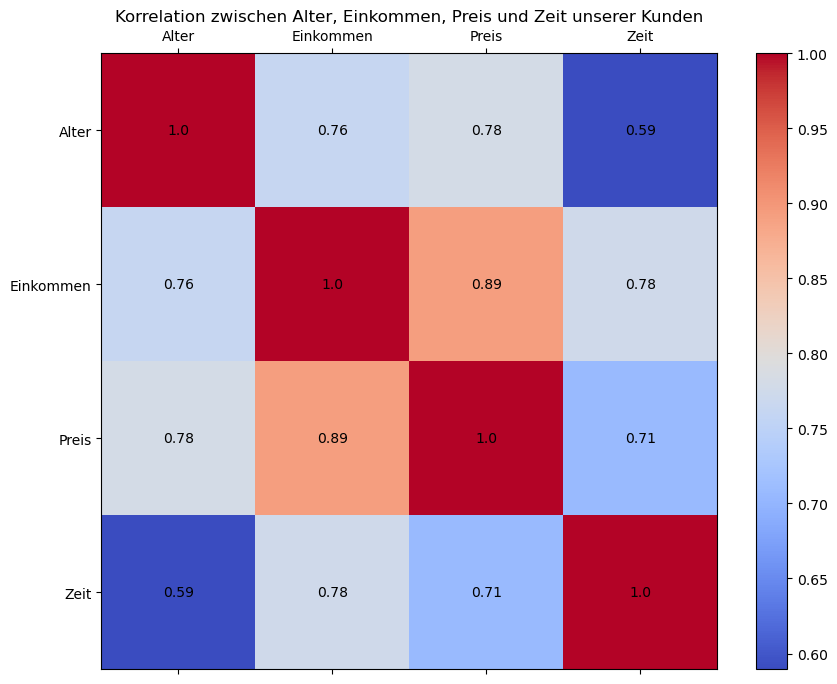

In [31]:
# Hier wird die Korrelation nochmal visuell dargestellt: 
corr_matrix = df_kunden.corr()

# Erstellen der Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Farbbar hinzufügen
fig.colorbar(cax)

# Setzen der x- und y-Achsen-Ticks und -Labels
ticks = np.arange(0, len(corr_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Annotieren der Zellen
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha="center", va="center", color="black")

# Setzen des Titels
plt.title('Korrelation zwischen Alter, Einkommen, Preis und Zeit unserer Kunden')

# Anzeigen der Heatmap
plt.show()

In [32]:
# Aufgabe 12 - Testen Sie grafisch mit Hilfe eines qq-Plos, ob die Variable Zeit approximativ normalverteilt ist.

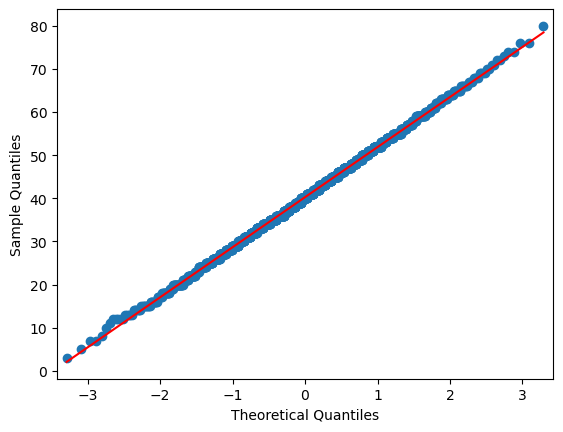

In [33]:
# Mit statsmodels erzeugen wir einen qq Plot unserer Zeit Variable und legen die Normalvertielung (Rotelinie) darüber.
# Zu sehen ist, dass die Variable Zeit approximativ normalverteilt ist.
sm.qqplot(df["Zeit"], line="s")
plt.show()

In [34]:
#Aufgabe 13 - Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen? 
#             Die Kundenabteilung hat vergessen, diese Informatonen zu erfassen. 
#             Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit aufgenommen haben.

In [35]:
# Bezug auf das vorherig erstellte DataFrame das nur Kundendaten enthält
# Mit dr Funktion np.where erzeugen wir in diesem df_kunden eine neue Spalte mit der 
# Bedingung, dass das Einkommen größer als der Preis sein muss. Um Fehler zu vermeiden, fragen wir ab ob der Preis > 1 ist.
df_kunden["Kredit"] = np.where((df_kunden["Einkommen"] < df_kunden["Preis"]) & (df_kunden["Preis"] > 1),1,0)
aufgabe_13 = str(df_kunden.Kredit.sum())
print("Es haben " + aufgabe_13 + " Kunden einen Bankkredit genutzt.")

#Es haben 1099 Kunden einen Bankkredit genutzt

Es haben 1099 Kunden einen Bankkredit genutzt.


In [36]:
# Aufgabe 14 - Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? 
#              Wählen Sie die geeigneten unabhängigen Variablen aus und schätzen Sie eine Regression 
#              unter Verwendung der geeigneten Methode 
#              (Verwenden Sie die Bibliothek statsmodel und nicht sklearn.)

In [37]:
# Auswahl der abhängigen und unabhängigen Variablen
unabhängigeVar = df_kunden[["Alter", "Einkommen"]]  
abhängigeVar = df_kunden["Preis"]

# Hinzufügen einer Konstanten zur Input-Matrix
unabhängigeVar = sm.add_constant(unabhängigeVar)

# Regression durchführen
model = sm.OLS(abhängigeVar, unabhängigeVar).fit()
results = model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     2508.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:49:07   Log-Likelihood:                -11775.
No. Observations:                1104   AIC:                         2.356e+04
Df Residuals:                    1101   BIC:                         2.357e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2036.5329   1366.681      1.490      0.136    -645.060    4718.125
Alter        497.2375     40.345     12.325      0.000     418.076     576.399
Einkommen      1.0516      0.029     35.857      0.000       0.994       1.109
==============================================================================
Omnibus:                       42.881   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.646
Skew:                           0.254   Prob(JB):                     4.16e-19
Kurtosis:                       4.258   Cond. No.                     2.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Antwort: 
# Sowohl das Alter als auch das Einkommen beeinflussen den Kaufpreis signifikant. Je älter oder je mehr Einkommen ein Kunde ist/hat
# desto höher ist der Kaufpreis. Durch den relativ hohen Wert von 0.820 für R-squared kann man sagen, dass das Modell gut geeignet ist,
# um den Kaufpreis zu erklären. 

In [39]:
# Aufgabe 15 - Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 32 Jahren mit einem Einkommen 
# von 30.000 Euro. Prognostizieren Sie den Kauf- preis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit einem 
# Einkommen von 54.000 Euro.

In [40]:
# Features und Zielvariable definieren
Kundeneigenschaften = df_kunden[['Alter', 'Einkommen']]
Kaufpreis = df_kunden['Preis']

# Lineares Regressionsmodell trainieren
model = LinearRegression()
model.fit(Kundeneigenschaften, Kaufpreis)

# Prognose für den ersten Kunden (32 Jahre, 30.000 Euro Einkommen)
kunde1 = np.array([[32, 30000]])
prognose1 = model.predict(kunde1)

# Prognose für den zweiten Kunden (51 Jahre, 54.000 Euro Einkommen)
kunde2 = np.array([[51, 54000]])
prognose2 = model.predict(kunde2)

print(f'Prognostizierter Kaufpreis für einen 32-jährigen Kunden mit einem Einkommen von 30.000 Euro: {prognose1[0]:.2f} Euro')
print(f'Prognostizierter Kaufpreis für einen 51-jährigen Kunden mit einem Einkommen von 54.000 Euro: {prognose2[0]:.2f} Euro')

Prognostizierter Kaufpreis für einen 32-jährigen Kunden mit einem Einkommen von 30.000 Euro: 49495.68 Euro
Prognostizierter Kaufpreis für einen 51-jährigen Kunden mit einem Einkommen von 54.000 Euro: 84181.23 Euro


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
# Aufgabe 16 - In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? Mit anderen Worten: 
# Die von Ihnen geschätzten Regressionskoeffizienten müs- sen direkt vergleichbar sein. Wie sollen die Daten transformiert werden?

In [44]:
# Features und Zielvariable definieren
Kundeneigenschaftenb = df_kunden[['Alter', 'Einkommen']]
Kaufpreisb = df_kunden['Preis']

# Standardisierung der Features
scaler = StandardScaler()
Kundeneigenschaftenb_scaled = scaler.fit_transform(Kundeneigenschaftenb)

# Lineares Regressionsmodell trainieren mit standardisierten Daten
model = LinearRegression()
model.fit(Kundeneigenschaftenb_scaled, Kaufpreisb)

# Regressionskoeffizienten
coefficients = model.coef_

# Ausgabe der Koeffizienten mit den zugehörigen Feature-Namen
for feature, coef in zip(Kundeneigenschaftenb.columns, coefficients):
    print(f'Standardisierter Koeffizient für {feature}: {coef:.4f}')

# Prognose für den ersten Kunden (32 Jahre, 30.000 Euro Einkommen)
kunde1 = scaler.transform(np.array([[32, 30000]]))
prognose1 = model.predict(kunde1)

# Prognose für den zweiten Kunden (51 Jahre, 54.000 Euro Einkommen)
kunde2 = scaler.transform(np.array([[51, 54000]]))
prognose2 = model.predict(kunde2)

print(f'\nPrognostizierter Kaufpreis für einen 32-jährigen Kunden mit einem Einkommen von 30.000 Euro: {prognose1[0]:.2f} Euro')
print(f'Prognostizierter Kaufpreis für einen 51-jährigen Kunden mit einem Einkommen von 54.000 Euro: {prognose2[0]:.2f} Euro')


Standardisierter Koeffizient für Alter: 5940.7954
Standardisierter Koeffizient für Einkommen: 17283.9133

Prognostizierter Kaufpreis für einen 32-jährigen Kunden mit einem Einkommen von 30.000 Euro: 49495.68 Euro
Prognostizierter Kaufpreis für einen 51-jährigen Kunden mit einem Einkommen von 54.000 Euro: 84181.23 Euro


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Aufgabe 17 - Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. 
# Verwenden Sie die entsprechende Methode.

In [45]:
# Features und Zielvariable definieren
X = df_kunden[['Alter', 'Einkommen']]
y = df_kunden['Preis']

# Standardisierung der Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistisches Regressionsmodell trainieren mit standardisierten Daten
model = LogisticRegression()
model.fit(X_scaled, y)

# Wahrscheinlichkeiten des Kaufs für den ersten Kunden (32 Jahre, 30.000 Euro Einkommen)
kunde1 = scaler.transform(np.array([[32, 30000]]))
prognose1 = model.predict_proba(kunde1)[:, 1]

# Wahrscheinlichkeiten des Kaufs für den zweiten Kunden (51 Jahre, 54.000 Euro Einkommen)
kunde2 = scaler.transform(np.array([[51, 54000]]))
prognose2 = model.predict_proba(kunde2)[:, 1]

print(f'Wahrscheinlichkeit des Kaufs für einen 32-jährigen Kunden mit einem Einkommen von 30.000 Euro: {prognose1[0]:.2f}')
print(f'Wahrscheinlichkeit des Kaufs für einen 51-jährigen Kunden mit einem Einkommen von 54.000 Euro: {prognose2[0]:.2f}')


ValueError: Unknown label type: 'continuous'

In [ ]:
# Aufgabe 18 - Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das 
# Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher 
# Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?

In [ ]:
# Hier kommt noch der Teil von Kazim
# Aufgabe 19 - Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen Sie die Operationen vor, 
# die Sie zum Zusammenführen und Bereinigen der Daten durchgeführt haben.

In [ ]:
# Aufgabe 20 - Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen? 
# Welche zusätzlichen Informationen sollten gesammelt werden? Formulieren Sie zwei Vorschläge.

In [ ]:
# Um die Vorhersagegenauigkeit und das Verständnis des Kundenverhaltens zu verbessern, würde ich der Kundenabteilung 
# die folgenden Vorschläge für die Umfrage im nächsten Jahr machen:

# Vorschlag 1: Sammlung von Daten über das Kundenverhalten und die Kaufentscheidungsfaktoren

# Zusätzliche Informationen:
# -Motivationen für den Autokauf: Nach den Hauptgründen fragen, warum Kunden ein Auto kaufen möchten 
#                                 (z.B. berufliche Notwendigkeit, Freizeit, Familienerweiterung, etc.)
# -Einflussfaktoren auf die Kaufentscheidung: Ermitteln, welche Faktoren die Kaufentscheidung am meisten beeinflussen 
#                                             (z.B. Preis-Leistungs-Verhältnis, Marke, technische Features, Nachhaltigkeit, 
#                                             Empfehlungen von Freunden/Familie).
# -Kundenzufriedenheit mit dem Testfahrerlebnis: Bewerten Sie, wie zufrieden Kunden mit ihrem Testfahrerlebnis sind
#                                                (z.B. Bewertung von 1-5).

# Begründung: Diese zusätzlichen Informationen geben Einblicke in die Gründe und Motivationen hinter den Kaufentscheidungen der Kunden. 
#             Sie helfen auch zu verstehen, welche Aspekte des Autos und des Kaufprozesses am wichtigsten sind, sodass unser Autohaus 
#             seine Strategien anpassen kann, um die Bedürfnisse und Erwartungen der Kunden besser zu erfüllen.

# Vorschlag 2: Erhebung von demografischen und psychografischen Daten

# Zusätzliche Informationen:
# -Berufliche Situation: Informationen über den Beruf und die Branche der Kunden.
# -Bildungsstand: Erfragen Sie den höchsten Bildungsabschluss der Kunden.
# -Freizeitinteressen und Lebensstil: Erheben Sie Informationen über die Freizeitinteressen und Hobbys der Kunden.
# -Haushaltsgröße und Familienstand: Informationen über die Anzahl der Personen im Haushalt und den Familienstand.

# Begründung:
# Demografische und psychografische Daten bieten wertvolle Erkenntnisse über die Zielgruppe und deren Lebensstil.
# Diese Informationen können genutzt werden, um gezielte Marketingstrategien zu entwickeln und die Produktangebote besser 
# an die Bedürfnisse der unterschiedlichen Kundensegmente anzupassen. Sie ermöglichen auch eine personalisierte Ansprache und 
# verbessern die Relevanz der Werbebotschaften.

# Durch die Sammlung dieser zusätzlichen Informationen kann die Kundenabteilung ein umfassenderes und genaueres Bild der 
# Kundenbedürfnisse und -verhaltensweisen zeichnen, was zu einer verbesserten Kundenbindung und höheren Verkaufszahlen führen kann.